1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO
1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS
1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO
1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS
1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO
1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS
1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO


/tmp/ipykernel_1248871/2053811044.py:82: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  bars = plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx], linewidth=0.5)


1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS
1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO
1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS
1024B
NOVA
4096B
NOVA
16384B
NOVA
1024B
PMFS
4096B
PMFS
16384B
PMFS
1024B
SplitFS-FIO
4096B
SplitFS-FIO
16384B
SplitFS-FIO
1024B
MadFS
4096B
MadFS
16384B
MadFS
1024B
EXT4-DAX
4096B
EXT4-DAX
16384B
EXT4-DAX
1024B
SLOTFS
4096B
SLOTFS
16384B
SLOTFS


<Figure size 2102.36x354.331 with 0 Axes>

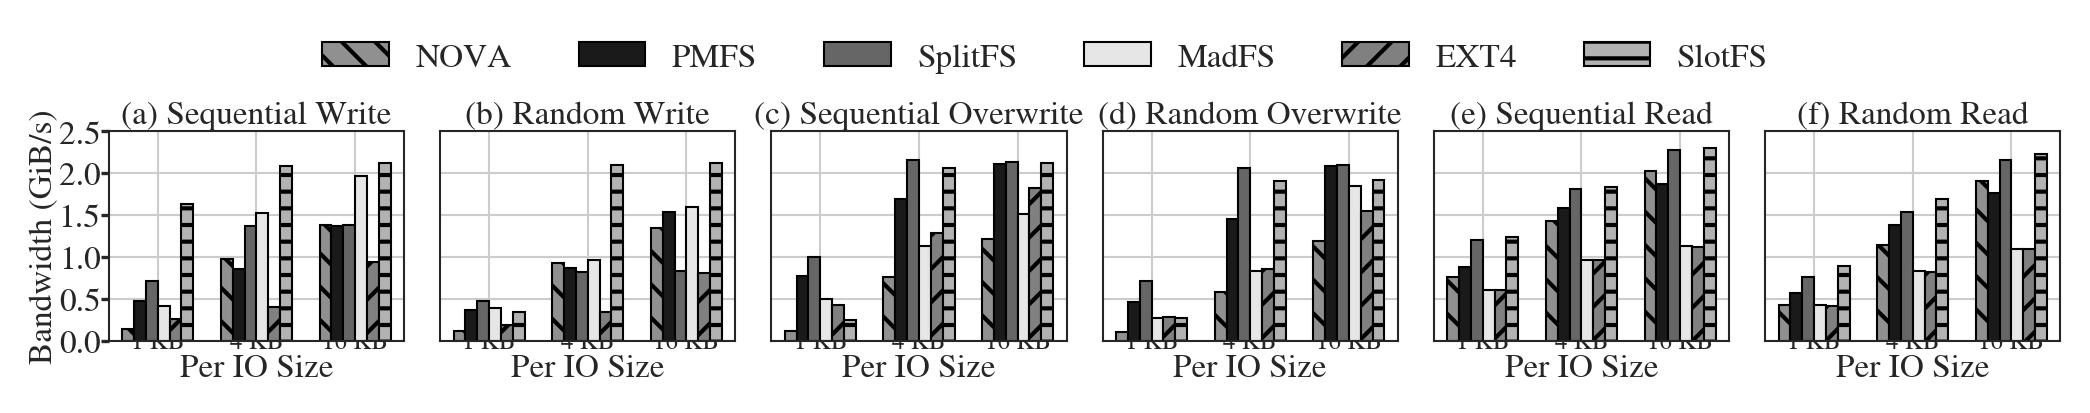

In [5]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

with open("./performance-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH) * 2, cm_to_inch(3)))
gs = gridspec.GridSpec(1, 18, figure=fig)

bar_width = 0.12
patterns = ['\\\\\\', ' ', ' ', ' ',  '///', '---', '///']
#colors = ['#547bb4', '#c0321a', '#629c35', '#dd7c4f', '#6c61af', '#d6eff4', '#e377c2']
colors = ['#909090', '#1A1A1A', '#666666', '#E6E6E6', '#808080', '#B2B2B2', '#E6E6E6', '#808080']
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
ops_order = ['seq-write', 'rnd-write', 'seq-overwrite', 'rnd-overwrite', 'seq-read', 'rnd-read']
block_sizes = ['1024B', '4096B', '16384B']

# Convert to GiB/s
df['value'] = df['bandwidth(MiB/s)'] / 1024

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH) * 2, cm_to_inch(3)))
gs = gridspec.GridSpec(1, 18, figure=fig)

bar_width = 0.12
patterns = ['\\\\\\', ' ', ' ', ' ',  '///', '---', '///']
colors = ['#909090', '#1A1A1A', '#666666', '#E6E6E6', '#808080', '#B2B2B2', '#E6E6E6', '#808080']
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
fss = ["NOVA", "PMFS", "SplitFS-FIO", "MadFS", "EXT4-DAX", "SLOTFS"]
tot = len(fss) * bar_width

titles = ["(a) Sequential Write", "(b) Random Write", "(c) Sequential Overwrite", 
          "(d) Random Overwrite", "(e) Sequential Read", "(f) Random Read"]
legend_handles = []

mapping = {
    "NOVA": "NOVA",
    "PMFS": "PMFS",
    "SLOTFS": "SlotFS",
    "MadFS": "MadFS",
    "SplitFS-FIO": "SplitFS",
    "EXT4-DAX": "EXT4"
}
mapped_fss = [mapping.get(item, item) for item in fss]


for fig_idx in range(6):
    subfig = fig.add_subplot(gs[0, fig_idx*3:(fig_idx+1)*3])
    op = ops_order[fig_idx]
    x_positions = [1, 2, 3]
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x_positions:
            points.append(pivot - tot/2 + bar_width/2 + idx*bar_width)
        bws = []
        for blk in block_sizes:
            print(blk)
            print(fs)
            bws.append(df[(df['ops'] == op) & (df['file_system'] == fs) 
                          & (df['blk_size'] == blk)]['value'].iloc[0])
        bars = plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx], linewidth=0.5)
        if fig_idx == 2 or fig_idx == 3:
            legend_handles.append(bars[0])

        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)
        
        plt.xticks(x_positions, labels=["1 KB", "4 KB", "16 KB"], fontsize=6)
        if fig_idx == 0:
            plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])
        else:
            plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5], labels=[])

        if fig_idx == 0:
            plt.ylabel('Bandwidth (GiB/s)', labelpad=-0.2)
        plt.xlabel('Per IO Size', labelpad=-0.2)
        
        plt.title(titles[fig_idx], fontsize=8, pad=2)

        plt.tick_params(axis='y', pad=0)
        plt.tick_params(axis='x', pad=-2.5)

        ax = plt.gca()
        if fig_idx == 0:
            ax.tick_params(axis='y', which='major', length=2, direction='out', right=False, left=True)
            ax.yaxis.set_tick_params(which='major', size=2)

legend_labels = [fs for fs in fss]
fig.legend(legend_handles, mapped_fss, loc='center', bbox_to_anchor=(0.5, 1.02), ncol=6,  frameon=False)

plt.tight_layout()
plt.savefig("./FIG-ST.pdf", bbox_inches='tight', pad_inches=0.05)